In [7]:
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import re     
import glob
from pandas import DataFrame
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Mecab
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pylab as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

from tqdm import tqdm_notebook

### 날짜데이터 정제

In [4]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('IT.csv',encoding='cp949')
name_list = df['이름'].values
print(name_list)

# # 전체 유튜버 한번에 돌리는 코드

# for name in name_list:
    
#     # 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
#     df = pd.read_csv(f'{name}/{name}_info.csv')


#     # column에 Unnames가 새로 생겨서 column 다시 지정해줌
#     df.columns = ['', 'name', 'thumbnail', 'view', 'previous_time',
#               'video_url', 'start_date', 'comment', 'likes_num', 'unlikes_num', 'time_duration']

#     # start_date를 리스트로
#     date_list = np.array(df['start_date'])

#     # 날짜만 뽑아 오는 정규표현식
#     p = re.compile("\d{4}[.]\s\d+[.]\s\d+[.]")

#     # 정규표현식에 맞는 날짜 저장할 리스트

#     new_date = [] # 정규표현식에 맞는 데이터 배열
#     real_date = [] # 리스트 안의 원소만 넣을 리스트

#     # 날짜 저장
#     for date in date_list:
#         new_date.append(re.findall(p, date))

#     # 2차원 배열을 1차원 배열로 만들어 줌 (대괄호 안붙게....)

#     for i in new_date:
#         try:
#             real_date.append(i[0])
#         except:
#             real_date.append('2020. 3. 1.')

#     # real_date = np.ravel(new_date)   

#     # 데이터프레임의 start_date 컬럼에 값 저장
#     df['start_date2'] = real_date
#     del df['start_date']

#     # info파일 덮어쓰기
#     df.to_csv(f'{name}/{name}_info.csv', index = False, encoding = 'utf-8-sig')

#     print(f'{name} 저장 완료')

['cdm_IT14' 'dongjun_IT20' 'fart_IT7' 'HELLOUKY_IT18' 'itsok_IT13'
 'ITSub잇섭_IT1' 'manneung_IT16' 'MRmr_IT3' 'ndolson_IT19' 'oh_IT6'
 'room_IT8' 'seoulian_IT11' 'sinsung_IT15' 'Thelog_IT12' 'UNDERkg_IT2'
 'yeungtae_IT17']


### 불용어사전 불러오기 및 수정

In [2]:
f= pd.read_csv('불용어사전(한글자).csv',encoding='cp949')
stop_list = list(f)
Unnamed = 'Unnamed: '+ str(len(stop_list)-1)
stop_list.extend(['진짜'])
stop_words = set(stop_list)

stop_words.remove(Unnamed)

# stop_words

# 단어 새로 추가했을 때에 사용!!!
f = open('불용어사전(한글자).csv','w')
for i in stop_words:
    f.write(i+',')
f.close()

### 인코딩 에러뜰 때 순차로 실행('euc-kr' or 'cp949')

In [ ]:
# # #인코딩 에러뜰때만 실행
# youtube_channel = input("유투브 채널 이름 입력하시오.")
# date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='cp949')

In [ ]:
# # #인코딩 에러뜰때만 실행


# date.to_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='utf-8-sig',index=False)

## 텍스트 마이닝 시작

현재 유튜버 : cdm_IT14
2020. 6. 2.
2020. 6. 2.
2020. 6. 1.
2020. 5. 28.
2020. 5. 27.
2020. 5. 20.
2020. 5. 19.
2020. 5. 17.
2020. 5. 14.
2020. 5. 13.
2020. 5. 13.
2020. 5. 9.
2020. 5. 8.
2020. 5. 2.
2020. 5. 2.
2020. 4. 27.
2020. 4. 26.
2020. 4. 25.
2020. 4. 23.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



cdm_IT14 date 컬럼 추가 완료


C:\Users\acorn\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


cdm_IT14token_result 저장 완료


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:138: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'크롬': 65, '사용': 63, '엣지': 58, '기능': 40, '제품': 37, '가격': 29, '맨': 28, '영상': 27, '브라우저': 25, '생각': 24, '씨디': 23, '스크린': 22, '같은': 22, '리뷰': 19, '듀얼': 19, '때문': 19, '구매': 19, '입니다': 18, '같네요': 18, '프로그램': 17, '웨일': 17, '문제': 16, '좋은': 15, '보고': 15, '바이러스': 15, '성능': 14, '유튜브': 14, '확장': 14, '공유기': 14, '설치': 13}


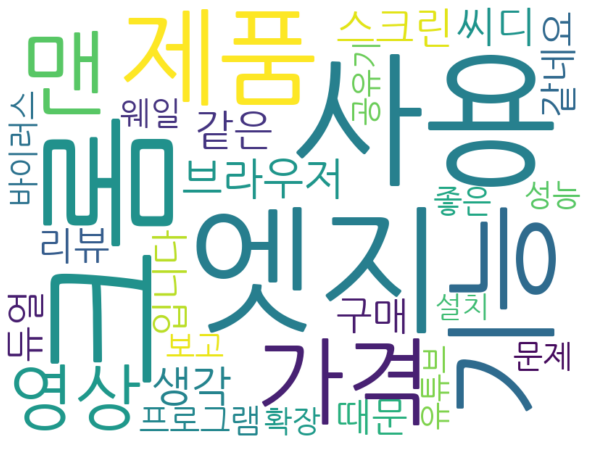

cdm_IT14word cloud 저장 완료
현재 유튜버 : dongjun_IT20
2020. 5. 31.
2020. 5. 28.
2020. 5. 27.
2020. 5. 27.
2020. 5. 26.
2020. 5. 25.
2020. 5. 25.
2020. 5. 24.
2020. 5. 22.
2020. 5. 21.
2020. 5. 20.
2020. 5. 19.
2020. 5. 14.
2020. 5. 12.
2020. 5. 11.
2020. 5. 8.
2020. 5. 5.
2020. 5. 3.
2020. 5. 1.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18



dongjun_IT20 date 컬럼 추가 완료
dongjun_IT20token_result 저장 완료



{'아이폰': 39, '삼성': 22, '빠': 17, '애플': 16, '카메라': 16, '노트': 15, '갤럭시': 13, '가격': 12, '프로': 12, '모델': 10, '폰': 8, '인치': 8, '디자인': 8, '그냥': 8, '제발': 7, '외부': 7, '엑시노스': 7, '플립': 6, '걸': 6, '생각': 6, '아이패드': 6, '말': 5, '네이비': 5, '블루': 5, '차이': 5, '건가': 5, '글래스': 5, '안경': 5, '화면': 5, '사용': 5}


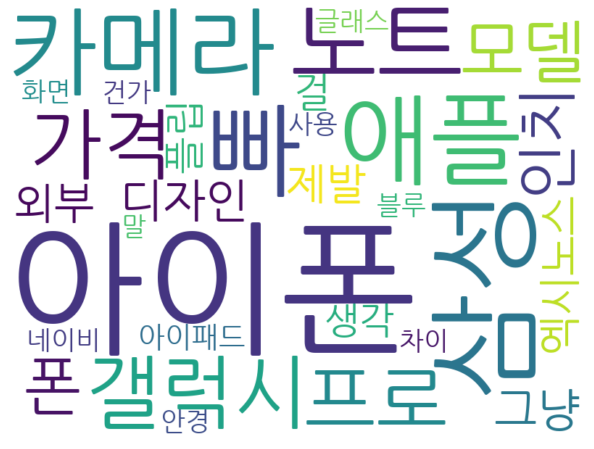

dongjun_IT20word cloud 저장 완료
현재 유튜버 : fart_IT7
2020. 5. 30.
2020. 5. 27.
2020. 5. 23.
2020. 5. 21.
2020. 5. 19.
2020. 5. 15.
2020. 5. 14.
2020. 5. 10.
2020. 5. 9.
2020. 5. 6.
2020. 5. 6.
2020. 5. 4.
2020. 5. 1.
2020. 4. 29.
2020. 4. 25.
2020. 4. 23.
2020. 4. 19.
2020. 4. 18.
2020. 4. 15.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18



fart_IT7 date 컬럼 추가 완료
fart_IT7token_result 저장 완료



{'노트북': 201, '벨벳': 161, '가격': 154, '말': 151, '폰': 147, '영상': 120, '리뷰': 118, '방구': 116, '디자인': 116, '사용': 109, '아이폰': 106, '제품': 101, '좋은': 95, '보고': 90, '렌즈': 89, '성능': 77, '엘지': 76, '생각': 72, '키': 72, '가성': 70, '구매': 67, '보드': 67, '비교': 65, '마우스': 63, '정말': 62, '네이버': 62, '카메라': 61, '비': 61, '입니다': 61, '모델': 60}


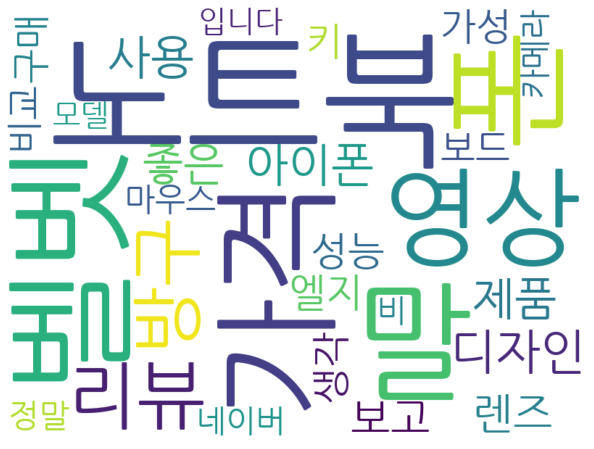

fart_IT7word cloud 저장 완료
현재 유튜버 : HELLOUKY_IT18
2020. 6. 1.
2020. 5. 30.
2020. 5. 27.
2020. 5. 25.
2020. 5. 18.
2020. 5. 15.
2020. 5. 12.
2020. 5. 8.
2020. 5. 4.
2020. 4. 27.
2020. 4. 24.
2020. 4. 24.
2020. 4. 17.
2020. 4. 10.
2020. 4. 9.
2020. 4. 6.
2020. 4. 1.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16



HELLOUKY_IT18 date 컬럼 추가 완료
HELLOUKY_IT18token_result 저장 완료



{'영상': 100, '키': 91, '리뷰': 35, '좋은': 33, '역시': 27, '오늘': 25, '소식': 23, '입니다': 19, '항상': 19, '가격': 18, '보고': 17, '같아요': 17, '인트': 17, '건강하시길': 16, '좋네요': 15, '프로': 15, '형님': 14, '정보': 13, '좋아요': 13, '어머님': 13, '디자인': 13, '새로운': 12, '하나': 11, '대박': 11, '촬영': 11, '편집': 11, '마이크': 11, '아이폰': 11, '배터리': 10, '이런': 10}


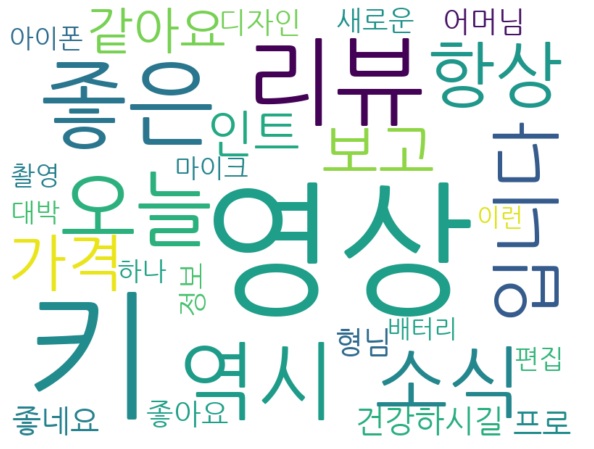

HELLOUKY_IT18word cloud 저장 완료
현재 유튜버 : itsok_IT13
2020. 6. 2.
2020. 5. 29.
2020. 5. 26.
2020. 5. 25.
2020. 5. 22.
2020. 5. 18.
2020. 5. 13.
2020. 5. 11.
2020. 5. 7.
2020. 5. 1.
2020. 4. 28.
2020. 4. 24.
2020. 4. 21.
2020. 4. 14.
2020. 4. 4.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14



itsok_IT13 date 컬럼 추가 완료
itsok_IT13token_result 저장 완료



{'영상': 239, '오케이': 195, '아이폰': 172, '민성': 160, '인트': 131, '오늘': 120, '잇츠': 108, '매력': 107, '리뷰': 90, '누나': 82, '언니': 81, '좋은': 77, '보고': 73, '축하': 71, '프로': 70, '구독': 62, '같아요': 60, '츠': 59, '항상': 59, '좋아요': 58, '생각': 56, '폰': 55, '말': 54, '정말': 51, '입니다': 51, '인트로': 50, '민': 48, '독자': 48, '갤럭시': 48, '설명': 46}


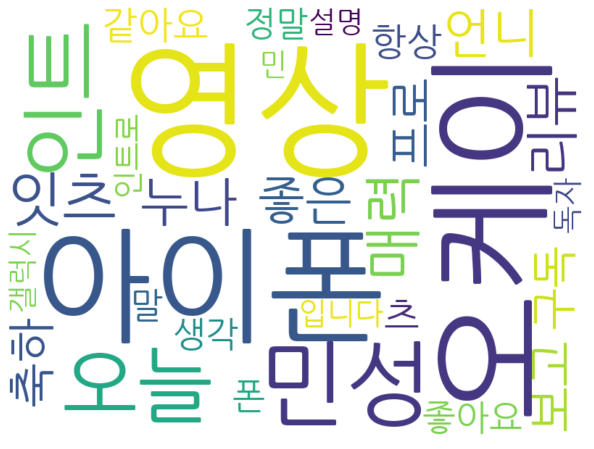

itsok_IT13word cloud 저장 완료
현재 유튜버 : ITSub잇섭_IT1
2020. 6. 1.
2020. 5. 30.
2020. 5. 27.
2020. 5. 25.
2020. 5. 23.
2020. 5. 20.
2020. 5. 18.
2020. 5. 16.
2020. 5. 14.
2020. 5. 11.
2020. 5. 9.
2020. 5. 6.
2020. 5. 4.
2020. 5. 1.
2020. 4. 29.
2020. 4. 27.
2020. 4. 25.
2020. 4. 22.
2020. 4. 20.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18



ITSub잇섭_IT1 date 컬럼 추가 완료
ITSub잇섭_IT1token_result 저장 완료



{'형': 353, '섭': 250, '영상': 222, '인트': 177, '리뷰': 164, '키': 148, '폰': 119, '아이폰': 119, '애플': 108, '보고': 91, '벨벳': 90, '보드': 90, '개': 85, '삼성': 84, '오늘': 82, '가격': 78, '노트북': 66, '좋아요': 55, '스킨': 54, '갤럭시': 52, '말': 50, '디자인': 49, '비': 48, '엘지': 47, '좋은': 45, '역시': 45, '생각': 44, '그냥': 43, '사람': 43, '사용': 42}


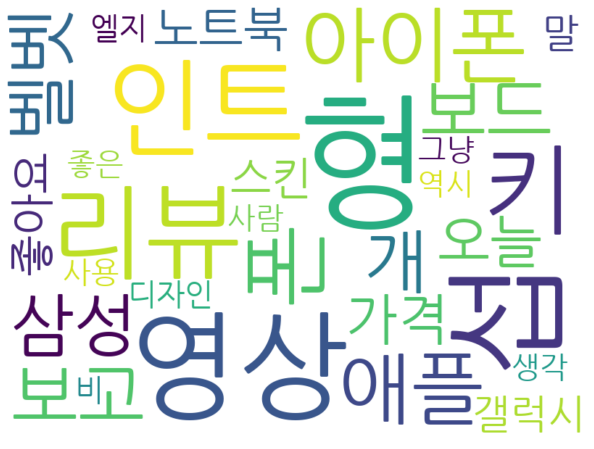

ITSub잇섭_IT1word cloud 저장 완료
현재 유튜버 : manneung_IT16
2020. 6. 2.
2020. 5. 29.
2020. 5. 27.
2020. 5. 25.
2020. 5. 15.
2020. 5. 15.
2020. 5. 14.
2020. 5. 9.
2020. 5. 8.
2020. 5. 6.
2020. 5. 3.
2020. 4. 30.
2020. 4. 24.
2020. 4. 22.
2020. 4. 20.
2020. 4. 19.
2020. 4. 15.
2020. 4. 15.
2020. 4. 13.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18



manneung_IT16 date 컬럼 추가 완료
manneung_IT16token_result 저장 완료



{'영상': 126, '형': 79, '인트': 78, '혁키님': 75, '이어폰': 72, '혁키': 68, '만능': 62, '좋은': 61, '리뷰': 60, '아이폰': 59, '유선': 58, '오늘': 51, '폰': 49, '벨벳': 48, '역시': 40, '정보': 32, '엘지': 32, '가격': 31, '요즘': 27, '생각': 27, '사용': 26, '보고': 26, '정말': 24, '사람': 23, '이번': 22, '댓글': 22, '항상': 22, '그냥': 22, '카메라': 22, '하나': 21}


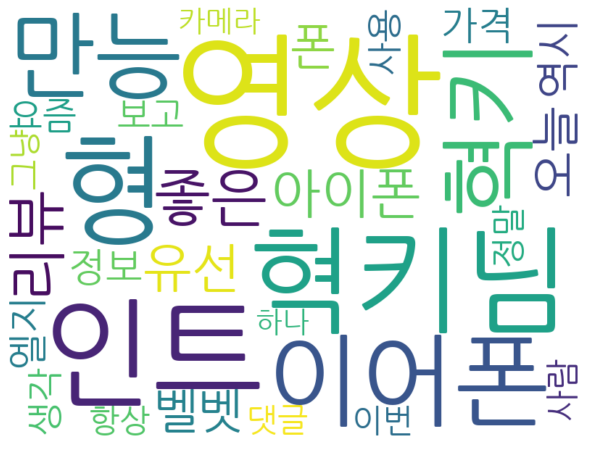

manneung_IT16word cloud 저장 완료
현재 유튜버 : MRmr_IT3
2020. 5. 31.
2020. 5. 29.
2020. 5. 26.
2020. 5. 23.
2020. 5. 21.
2020. 5. 16.
2020. 5. 15.
2020. 5. 12.
2020. 5. 9.
2020. 5. 5.
2020. 4. 29.
0
1
2
3
4
5
6
7
8
9
10



MRmr_IT3 date 컬럼 추가 완료
MRmr_IT3token_result 저장 완료



{'아이폰': 183, '영상': 153, '형': 116, '폰': 101, '케이스': 98, '마리': 83, '보고': 76, '엠알님': 72, '짝퉁': 63, '항상': 60, '리뷰': 60, '애플': 58, '벨벳': 54, '좋은': 52, '삼성': 52, '마스크': 52, '엘지': 45, '가격': 44, '오늘': 43, '갤럭시': 43, '프로': 39, '그냥': 39, '코드': 39, '꼭': 35, '청량': 34, '사람': 33, '인식': 33, '정보': 32, '이번': 32, '개': 32}


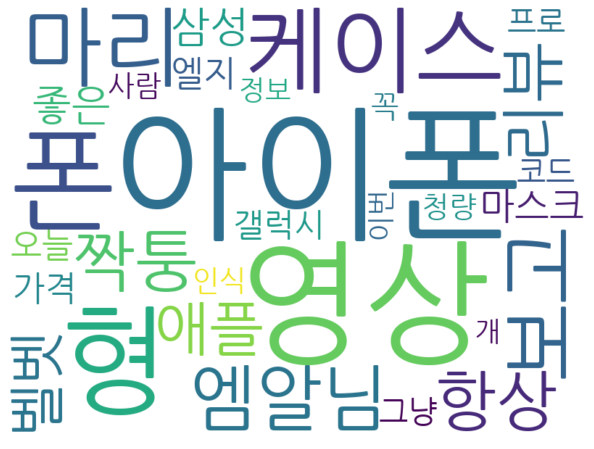

MRmr_IT3word cloud 저장 완료
현재 유튜버 : ndolson_IT19
2020. 6. 2.
2020. 5. 18.
2020. 5. 11.
2020. 5. 6.
2020. 4. 25.
2020. 4. 22.
2020. 4. 13.
2020. 4. 3.
0
1
2
3
4
5
6
7



ndolson_IT19 date 컬럼 추가 완료
ndolson_IT19token_result 저장 완료



{'제품': 69, '와이파이': 61, '사용': 46, '좋은': 45, '디자인': 36, '공유기': 31, '기능': 30, '영상': 29, '지역': 29, '리뷰': 27, '음영': 27, '같습니다': 23, '가격': 23, '성능': 22, '스피커': 21, '정말': 19, '구매': 19, '좋네요': 17, '레트로': 17, '집': 17, '메시': 17, '지원': 16, '라디오': 16, '리모컨': 16, '생각': 15, '점': 15, '정보': 15, '청소기': 12, '링크시스': 12, '같아요': 11}


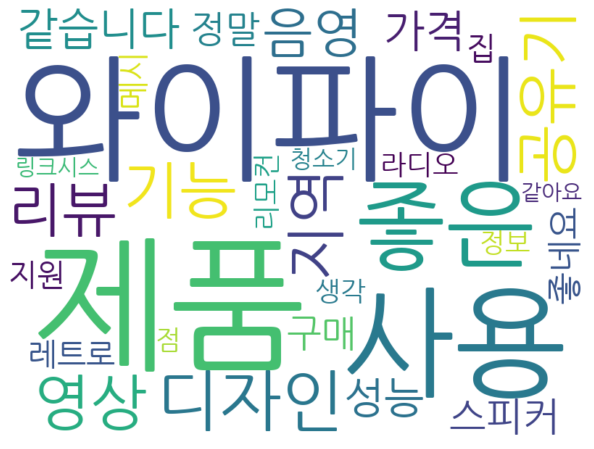

ndolson_IT19word cloud 저장 완료
현재 유튜버 : oh_IT6
2020. 6. 2.
2020. 5. 26.
2020. 5. 24.
2020. 5. 22.
2020. 5. 21.
2020. 5. 19.
2020. 5. 10.
2020. 5. 8.
2020. 5. 5.
2020. 4. 27.
2020. 4. 24.
2020. 4. 21.
2020. 4. 13.
2020. 4. 10.
2020. 4. 6.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14



oh_IT6 date 컬럼 추가 완료
oh_IT6token_result 저장 완료



{'산다': 239, '다이슨': 211, '공기청정기': 186, '때문': 155, '삼성': 66, '디자인': 51, '성능': 50, '같아요': 47, '제품': 46, '좋은': 45, '공기': 43, '사용': 37, '구매': 37, '생각': 36, '기능': 34, '가격': 33, '영상': 33, '기술': 30, '집': 28, '엘지': 27, '입니다': 27, '그냥': 26, '비교': 25, '가습기': 25, '모니터': 24, '선풍기': 23, '좋아요': 22, '요즘': 21, '면': 21, '필터': 21}


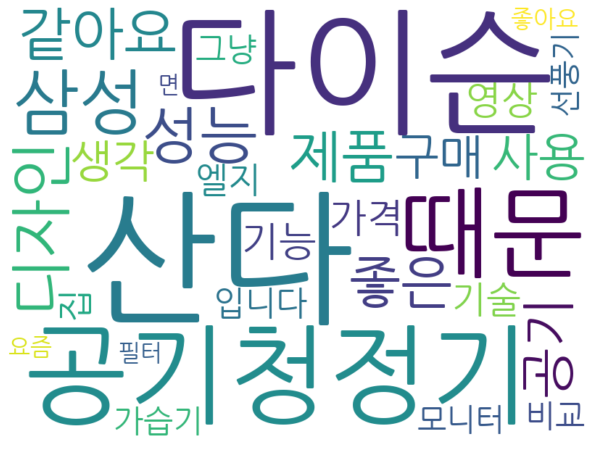

oh_IT6word cloud 저장 완료
현재 유튜버 : room_IT8
2020. 6. 1.
2020. 5. 29.
2020. 5. 27.
2020. 5. 23.
2020. 5. 21.
2020. 5. 19.
2020. 5. 16.
2020. 5. 13.
2020. 5. 12.
2020. 5. 7.
2020. 5. 6.
2020. 5. 4.
2020. 5. 1.
2020. 4. 29.
2020. 4. 28.
2020. 4. 25.
2020. 4. 22.
2020. 4. 21.
2020. 4. 17.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18



room_IT8 date 컬럼 추가 완료
room_IT8token_result 저장 완료



{'영상': 321, '사용': 151, '방': 144, '구석': 141, '아이패드': 138, '프로': 121, '아이폰': 118, '리뷰': 105, '애플': 103, '인치': 99, '정말': 97, '에어': 89, '키': 88, '보고': 88, '좋은': 86, '맥북': 82, '보드': 77, '앱': 77, '세대': 75, '혹시': 74, '정보': 73, '이번': 72, '생각': 68, '같아요': 67, '입니다': 65, '업데이트': 65, '고민': 65, '가격': 58, '있습니다': 57, '구매': 56}


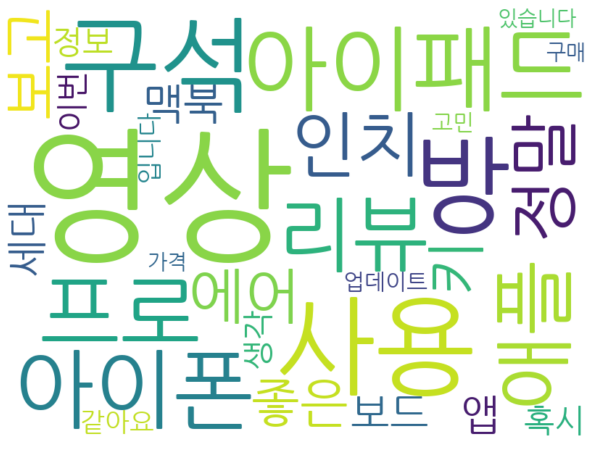

room_IT8word cloud 저장 완료
현재 유튜버 : seoulian_IT11
2020. 6. 1.
2020. 5. 29.
2020. 5. 26.
2020. 5. 23.
2020. 5. 21.
2020. 5. 19.
2020. 5. 17.
2020. 5. 15.
2020. 5. 13.
2020. 5. 10.
2020. 5. 7.
2020. 5. 5.
2020. 5. 2.
2020. 4. 29.
2020. 4. 27.
2020. 4. 25.
2020. 4. 22.
2020. 4. 21.
2020. 4. 18.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18



seoulian_IT11 date 컬럼 추가 완료
seoulian_IT11token_result 저장 완료



{'리안': 326, '영상': 252, '리뷰': 151, '보드': 122, '키': 115, '나비': 102, '좋은': 96, '제품': 96, '가격': 91, '사용': 85, '보고': 84, '오늘': 79, '누나': 73, '맥북': 68, '하나': 67, '입니다': 64, '애플': 64, '정말': 64, '맥프로': 60, '생각': 58, '역시': 57, '맥': 57, '돈': 56, '인트': 55, '그냥': 55, '카메라': 54, '인치': 53, '비': 50, '서울': 50, '있는': 49}


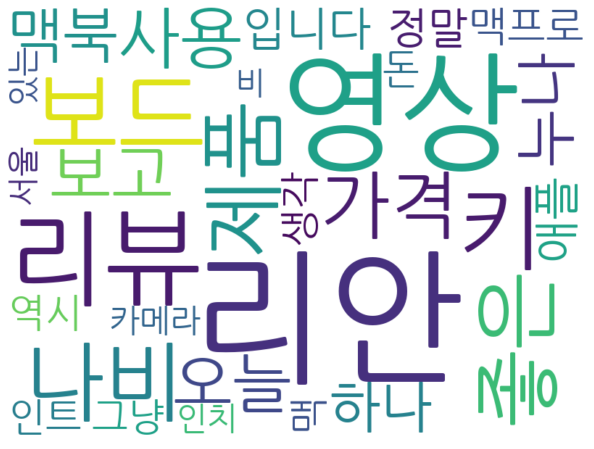

seoulian_IT11word cloud 저장 완료
현재 유튜버 : sinsung_IT15
2020. 6. 1.
2020. 5. 30.
2020. 5. 29.
2020. 5. 26.
2020. 5. 23.
2020. 5. 22.
2020. 5. 20.
2020. 5. 17.
2020. 5. 14.
2020. 5. 12.
2020. 5. 10.
2020. 5. 7.
2020. 5. 5.
2020. 5. 1.
2020. 4. 28.
2020. 4. 25.
2020. 4. 22.
2020. 4. 19.
2020. 4. 16.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18



sinsung_IT15 date 컬럼 추가 완료
sinsung_IT15token_result 저장 완료



{'영상': 334, '인텔': 301, '성능': 207, '세대': 207, '가격': 206, '게임': 190, '성조': 187, '오버': 183, '보드': 177, '좋은': 169, '젠': 157, '생각': 146, '라이': 137, '보고': 128, '코어': 123, '정도': 113, '램': 109, '입니다': 108, '추천': 104, '항상': 104, '비교': 103, '사용': 101, '차이': 96, '좋아요': 92, '사람': 88, '가성': 88, '정말': 87, '비': 84, '그냥': 84, '리뷰': 82}


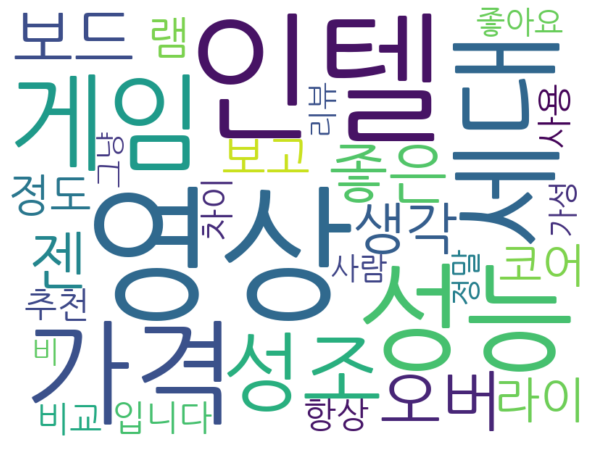

sinsung_IT15word cloud 저장 완료
현재 유튜버 : Thelog_IT12
2020. 6. 2.
2020. 5. 28.
2020. 5. 12.
2020. 5. 4.
2020. 4. 28.
2020. 4. 23.
2020. 4. 17.
2020. 4. 17.
2020. 4. 12.
2020. 4. 6.
0
1
2
3
4
5
6
7
8
9



Thelog_IT12 date 컬럼 추가 완료
Thelog_IT12token_result 저장 완료



{'배터리': 84, '아이폰': 81, '영상': 62, '폰': 58, '형': 56, '정도': 33, '테스트': 32, '가격': 30, '애플': 28, '리뷰': 28, '세차': 28, '조루': 28, '그냥': 26, '모델': 25, '프로': 25, '사용': 23, '생각': 21, '테슬라': 21, '갤럭시': 21, '용량': 21, '사람': 19, '열쓰님': 19, '쉬': 18, '입니다': 18, '충전': 18, '게임': 18, '지금': 17, '가요': 17, '비교': 17, '같은': 17}


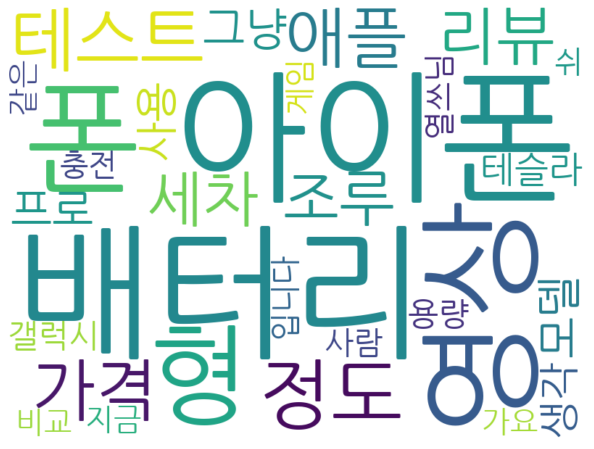

Thelog_IT12word cloud 저장 완료
현재 유튜버 : UNDERkg_IT2
2020. 6. 1.
2020. 5. 28.
2020. 5. 25.
2020. 5. 24.
2020. 5. 22.
2020. 5. 21.
2020. 5. 19.
2020. 5. 18.
2020. 5. 15.
2020. 5. 13.
2020. 5. 9.
2020. 5. 6.
2020. 5. 5.
2020. 5. 4.
2020. 5. 3.
2020. 5. 1.
2020. 4. 30.
2020. 4. 28.
2020. 4. 27.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18



UNDERkg_IT2 date 컬럼 추가 완료
UNDERkg_IT2token_result 저장 완료



{'폰': 227, '리뷰': 160, '두목': 149, '삼성': 118, '아이폰': 105, '벨벳': 101, '가격': 100, '영상': 95, '카메라': 84, '스피커': 83, '생각': 77, '화면': 70, '갤럭시': 69, '배터리': 64, '그냥': 61, '사용': 60, '애플': 59, '노트': 58, '업데이트': 58, '펜': 57, '성능': 56, '엘지': 55, '보고': 54, '사람': 51, '정도': 51, '티비': 49, '안드로이드': 48, '제품': 48, '인트': 48, '중': 47}


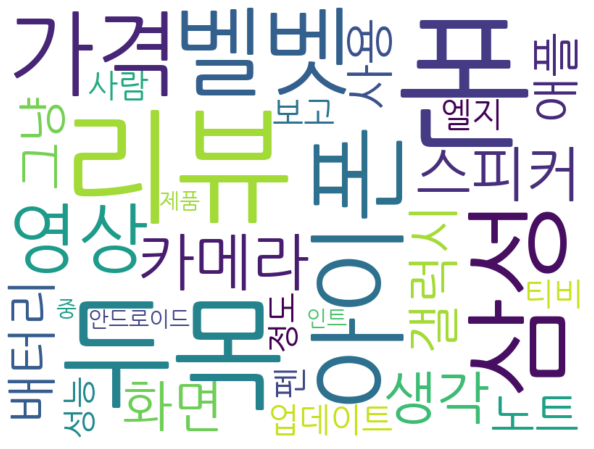

UNDERkg_IT2word cloud 저장 완료
현재 유튜버 : yeungtae_IT17
2020. 5. 30.
2020. 5. 27.
2020. 5. 6.
2020. 5. 1.
2020. 4. 14.
2020. 4. 6.
0
1
2
3
4
5



yeungtae_IT17 date 컬럼 추가 완료
yeungtae_IT17token_result 저장 완료



{'제품': 20, '태형': 19, '사용': 19, '마이크': 16, '노래방': 16, '사람': 15, '좋은': 13, '말씀': 13, '정말': 12, '정도': 12, '노래': 12, '구매': 11, '영상': 11, '입니다': 11, '같네요': 11, '생각': 10, '스피커': 10, '보고': 9, '의자': 9, '같은': 9, '요즘': 8, '다른': 8, '녹음': 8, '아놀드': 8, '홍': 8, '다시': 7, '리뷰': 7, '지금': 7, '에코': 7, '출력': 7}


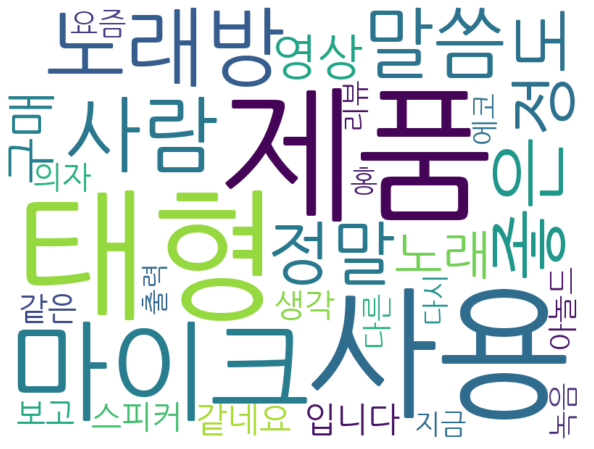

yeungtae_IT17word cloud 저장 완료


In [5]:
# 파일 합치는 곳 (폴더 제목 입력)
# 댓글에 날짜 추가!!!
for youtube_channel in name_list:
#     youtube_channel = input("유투브 채널 이름 입력하시오.")
    youtube_channel = youtube_channel
    print("현재 유튜버 : " + youtube_channel)
#     if youtube_channel :
#     date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
    date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
    ccc = date[date['start_date2'] >= '2020. 4. 1']['start_date2']

    ccc
    # pd.read_csv('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_[i+1].csv')

    for i in ccc:
         print(i)
    #     a = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))['youtube'].values
    #     np.append(comment_date, a)     up_date = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
    #     comment_date.append(up_date)
    comment_date = []
    for i in range(len(ccc)):
        print(i)
        a = pd.read_csv((youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
        comment_date.append(a)

#     comment_date[0]
    for i in tqdm_notebook(range(len(ccc))):

        df = comment_date[i]
        you_id = df['youtube_id'].values
        co_id = df['comment'].values
        likes = df['like_num'].values
        start_date = ccc[i]
        comment_final = pd.DataFrame(data = {'닉네임':you_id,
                                    '댓글':co_id,
                                    '좋아요수':likes,
                                    '날짜':start_date})
        comment_final.to_csv(youtube_channel+'/comment/'+ youtube_channel +'_comment_date{}.csv'.format(i+1),
                            encoding='utf-8-sig',index=False)    

    print(youtube_channel + ' date 컬럼 추가 완료')

    path =  str(youtube_channel) + "/comment"
    path2 = str(youtube_channel) + '/result.csv'
    arg_youtube = str(youtube_channel) + "*"


    allFile_list = glob.glob(os.path.join(path,arg_youtube))
    #print(allFile_list)
    allData = []
    for file in allFile_list:
        if 'date' in file:
            # print(file)
            df = pd.read_csv(file)
            allData.append(df)

    dataCombine = pd.concat(allData,axis =0, ignore_index = True)

    dataCombine.to_csv(path2, index = False, encoding = 'utf-8-sig')
    cdPath = str(youtube_channel) + '/result.csv'
    comment_data = pd.read_csv(cdPath)
    comment_data ##제대로 출력되는지 확인
    com_list = list(comment_data['댓글'])   ##제대로 출력되는지 확인
    # com_list   ##제대로 출력되는지 확인

    # ### 추출된 단어가 무슨 형태인지 파악
    # # for sentence in com_list:
    # #     morph = twitter.pos(sentence)
    # #     sentences_tag.append(morph)

    # 추출 단어들 저장

    def get_noun(comment_txt):

        twitter = Twitter()
        noun_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Noun']:

                    if word not in stop_words:
                        noun_list.append(word)

        return noun_list

    def get_adj(comment_txt):

        twitter = Twitter()
        adj_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Adjective']:
                    if word not in stop_words:
                        adj_list.append(word)

        return adj_list

    def get_verb(comment_txt):

        twitter = Twitter()
        verb_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Verb']:
                    if word not in stop_words:
                        verb_list.append(word)
        return verb_list

    comment_list = []
    for i in range(len(comment_data)):
        comment_list.append(comment_data['댓글'].iloc[i])

    comment_result = []

    for i in comment_list:
        comment_result.append(i)

    comment_result = pd.DataFrame(comment_result, columns=["comment"])

    #cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
    comment_result['noun'] = comment_result['comment'].apply(lambda x: get_noun(x))
    comment_result['adj'] = comment_result['comment'].apply(lambda x: get_adj(x))
    comment_result['verb'] = comment_result['comment'].apply(lambda x: get_verb(x))

    comment_result.to_csv(youtube_channel +'/{}token_result.csv'.format(youtube_channel),
                                                                       index = False, encoding = 'utf-8-sig')
    print(youtube_channel + 'token_result 저장 완료')

    twitter = Twitter()

    sentences_tag = []
    for sentence in tqdm_notebook(com_list):
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)

    stop_words
    for sentence in comment_data:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
    #     print(morph)
    #     print('-'*30)

    # print(sentences_tag)
    # print(len(sentences_tag))
    # print('\n'*3)

    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective','verb']:
                if word not in stop_words:
                    noun_adj_list.append(word)            

    counts = Counter(noun_adj_list)
    select_data = counts.most_common(30)


    wc = WordCloud(font_path='NanumGothic.ttf',max_font_size=200,background_color='white' ,width=800, height=600)

    print(dict(select_data))
    cloud = wc.generate_from_frequencies(dict(select_data))
    plt.figure(figsize=(12, 8))
    plt.axis('off')
    plt.imshow(cloud,interpolation='bilinear')
    plt.show()
    cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
    
    print(youtube_channel + 'word cloud 저장 완료')